In [1]:
%matplotlib inline

In [39]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
sample = pd.read_csv('part1data1.txt')
sample.tail()

,population,benefit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


## 1.1 Visualization

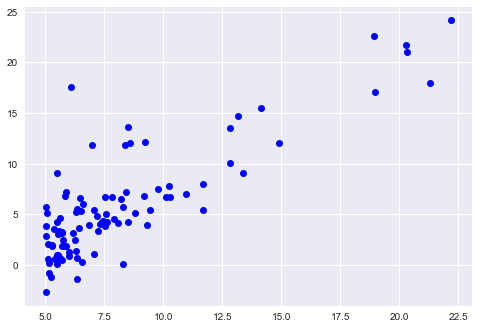

In [41]:
plt.plot(sample.ix[:,0], sample.ix[:,1], 'bo')

In [42]:
data = sample
n = 2
m = data.shape[0]
scaleInfo = []

x = data.ix[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T

for i in range(0, n):
    scaleInfo.append( [ x[:,i].min(), x[:,i].mean(), x[:,i].max()] )
    
for i in range(1, n):
    for j in range(0, m):
        r = scaleInfo[i][2] - scaleInfo[i][0]
        if r != 0:
            x[j][i] = ( x[j][i] - scaleInfo[i][1] ) / r
        else:
            x[j][i] = ( x[j][i] - scaleInfo[i][1] ) / 1

y = np.array( data.ix[:,-1] )
y = y.T

# print(x)
# print(y)

## 1.2 Gradient Descent

In [79]:
def findRegression(dataX, dataY):
    autoAlphaSelect = False
    iterCount = 1500
    alpha = .01
    theta = np.array(n * [0])

    j = []
    complete = False

    while( not complete ):
        complete = True
        for _ in range(0, iterCount):
            h = np.dot(dataX , theta)
            loss = h - dataY
            gradient = np.dot(loss , dataX)
            theta = theta - alpha / m * gradient
            j += [ abs(np.array(loss)).sum() ]

            for i in range(0,n):
                theta[i] = theta[i] - (alpha / m * dataX[:,1].dot(loss))

            # fix big alpha
            if ( autoAlphaSelect and j[ len(j)-1 ] > j[ len(j)-2 ]):
                complete = False
                alpha = alpha / 10
#                 print('alpha:', alpha)
                theta = np.array(n * [0])
                j.clear()
                break
    return theta, j
                
theta, j = findRegression(x, y)
print('theta:', theta )

theta: [  6.09248237  15.95554285]


## به تصویر کشیدن تابع هزینه - امتیازی

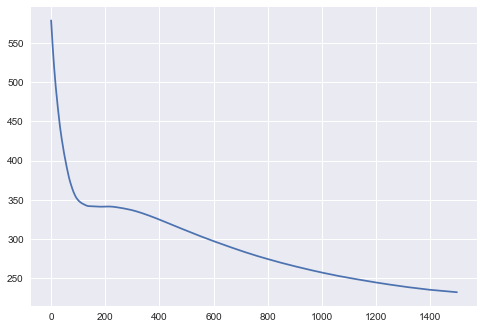

In [80]:
plt.plot(j)

In [81]:
def scale(a, scaleInfo):
    result = [1]
    for i in range(1, n):
        r = scaleInfo[i][2] - scaleInfo[i][0]
        if r != 0:
            result += [( a[i-1] - scaleInfo[i][1] ) / r]
        else:
            result += [( a[i-1] - scaleInfo[i][1] ) / 1]
    return result

(5.0269000000000004, 3.1822105305838297) (22.203000000000003, 19.137753383718206)


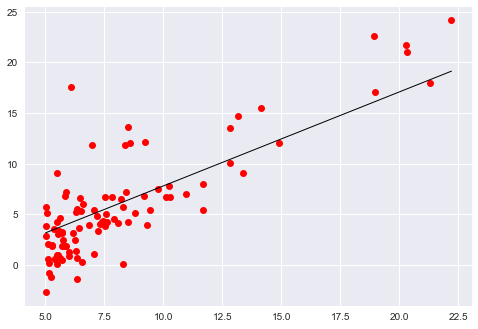

In [82]:
tableMin = sample.ix[:, 0].min()
tableMax = sample.ix[:, 0].max()

a = (tableMin, np.array(scale([tableMin], scaleInfo)).dot(theta))
b = (tableMax, np.array(scale([tableMax], scaleInfo)).dot(theta))

print( a, b)
            
plt.plot(sample.ix[:,0], sample.ix[:,1], 'ro')
plt.plot([ a[0], b[0] ], [ a[1], b[1] ], 'k-', lw=1)

## RANSAC (امتیازی)

In [95]:
iteration = 100
sampleCount = m * 60 // 100
errorSize = 2

bestFit = 0
bestTheta = None
bestIndex = None
bestJ = None

def findInlinesCount(dataX, dataY, sampleTetha, error):
    dataSize = len(dataY)
    count = 0
    for i in range( dataSize ):
        diff = abs( np.dot(np.array(sampleTetha), np.array(dataX[i])) - dataY[i] )
        if diff < errorSize:
            count += 1
    return count
    
for i in range(iteration):
    sampleDataIndex = random.sample( range(m), sampleCount)
    sampleX = x[ sampleDataIndex ]
    sampleY = y[ sampleDataIndex ]
    sampleTetha, sampleJ = findRegression( sampleX, sampleY )
    
    inlineCound = findInlinesCount(x, y, sampleTetha, errorSize)
    if inlineCound > bestFit:
        bestFit = inlineCound
        bestTheta = sampleTetha
        bestIndex = sampleDataIndex
        bestJ = sampleJ

(5.0269000000000004, 3.3902828016231505) (22.203000000000003, 17.823013884414877)
54


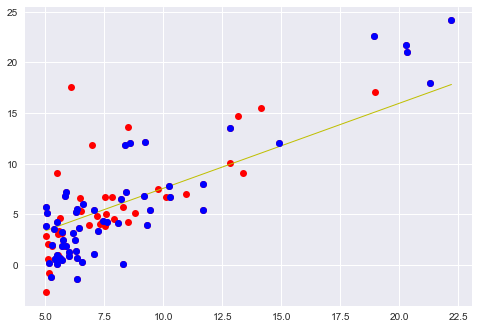

In [96]:
a = (tableMin, np.array(scale([tableMin], scaleInfo)).dot(bestTheta))
b = (tableMax, np.array(scale([tableMax], scaleInfo)).dot(bestTheta))

print( a, b)
print( bestFit )
            
plt.plot(sample.ix[:,0], sample.ix[:,1], 'ro')
plt.plot([ a[0], b[0] ], [ a[1], b[1] ], 'y-', lw=1)
plt.plot(sample.ix[bestIndex,0], sample.ix[bestIndex,1], 'bo')